## GDrive 연결

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


## Import library & check GPU



In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import tensorflow as tf
import PIL.Image as pilimg
import os

# gpu
print(len(tf.config.experimental.list_physical_devices('GPU')))

1


In [3]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, Conv2DTranspose, BatchNormalization

import random
import pickle
import cv2
import matplotlib

from glob import glob
from numpy import random
from PIL import Image

## Copy data and unzip

In [4]:
!cp '/gdrive/MyDrive/CV4_Data/zoomin.zip' ./
!cp '/gdrive/MyDrive/CV4_Data/zoomout.zip' ./
!cp '/gdrive/MyDrive/CV4_Data/destroyed.zip' ./

In [5]:
!ls -al

total 312800
drwxr-xr-x 1 root root      4096 Aug  8 02:54 .
drwxr-xr-x 1 root root      4096 Aug  8 02:53 ..
drwxr-xr-x 4 root root      4096 Aug  3 20:20 .config
-rw------- 1 root root   1136193 Aug  8 02:54 destroyed.zip
drwxr-xr-x 1 root root      4096 Aug  3 20:21 sample_data
-rw------- 1 root root 161112367 Aug  8 02:54 zoomin.zip
-rw------- 1 root root 158032127 Aug  8 02:54 zoomout.zip


In [6]:
!unzip zoomin.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: zoomin/zoom_in1850.jpg  
  inflating: __MACOSX/zoomin/._zoom_in1850.jpg  
  inflating: zoomin/zoom_in4900.jpg  
  inflating: __MACOSX/zoomin/._zoom_in4900.jpg  
  inflating: zoomin/zoom_in1878.jpg  
  inflating: __MACOSX/zoomin/._zoom_in1878.jpg  
  inflating: zoomin/zoom_in8684.jpg  
  inflating: __MACOSX/zoomin/._zoom_in8684.jpg  
  inflating: zoomin/zoom_in6871.jpg  
  inflating: __MACOSX/zoomin/._zoom_in6871.jpg  
  inflating: zoomin/zoom_in09842.jpg  
  inflating: __MACOSX/zoomin/._zoom_in09842.jpg  
  inflating: zoomin/zoom_in3909.jpg  
  inflating: __MACOSX/zoomin/._zoom_in3909.jpg  
  inflating: zoomin/zoom_in09856.jpg  
  inflating: __MACOSX/zoomin/._zoom_in09856.jpg  
  inflating: zoomin/zoom_in8690.jpg  
  inflating: __MACOSX/zoomin/._zoom_in8690.jpg  
  inflating: zoomin/zoom_in6865.jpg  
  inflating: __MACOSX/zoomin/._zoom_in6865.jpg  
  inflating: zoomin/zoom_in4914.jpg  
  inflating: __MACOSX/zoomin/._zoom_in4914.jpg  
  i

In [7]:
!unzip zoomout.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: zoomout/zoom_out10229.jpg  
  inflating: __MACOSX/zoomout/._zoom_out10229.jpg  
  inflating: zoomout/zoom_out08466.jpg  
  inflating: __MACOSX/zoomout/._zoom_out08466.jpg  
  inflating: zoomout/zoom_out07999.jpg  
  inflating: __MACOSX/zoomout/._zoom_out07999.jpg  
  inflating: zoomout/zoom_out07741.jpg  
  inflating: __MACOSX/zoomout/._zoom_out07741.jpg  
  inflating: zoomout/zoom_out08472.jpg  
  inflating: __MACOSX/zoomout/._zoom_out08472.jpg  
  inflating: zoomout/zoom_out5913.jpg  
  inflating: __MACOSX/zoomout/._zoom_out5913.jpg  
  inflating: zoomout/zoom_out08314.jpg  
  inflating: __MACOSX/zoomout/._zoom_out08314.jpg  
  inflating: zoomout/zoom_out3392.jpg  
  inflating: __MACOSX/zoomout/._zoom_out3392.jpg  
  inflating: zoomout/zoom_out09022.jpg  
  inflating: __MACOSX/zoomout/._zoom_out09022.jpg  
  inflating: zoomout/zoom_out0843.jpg  
  inflating: __MACOSX/zoomout/._zoom_out0843.jpg  
  inflating: zoomout/zoom_out1585.jpg  


In [8]:
!unzip destroyed.zip

Archive:  destroyed.zip
   creating: destroyed/
  inflating: __MACOSX/._destroyed    
  inflating: destroyed/d_29.jpeg     
  inflating: __MACOSX/destroyed/._d_29.jpeg  
  inflating: destroyed/d_13.jpeg     
  inflating: __MACOSX/destroyed/._d_13.jpeg  
  inflating: destroyed/d_3.jpeg      
  inflating: __MACOSX/destroyed/._d_3.jpeg  
  inflating: destroyed/d_25.jpeg     
  inflating: __MACOSX/destroyed/._d_25.jpeg  
  inflating: destroyed/d_33.jpeg     
  inflating: __MACOSX/destroyed/._d_33.jpeg  
  inflating: destroyed/d_32.jpeg     
  inflating: __MACOSX/destroyed/._d_32.jpeg  
  inflating: destroyed/d_24.jpeg     
  inflating: __MACOSX/destroyed/._d_24.jpeg  
  inflating: destroyed/d_2.jpeg      
  inflating: __MACOSX/destroyed/._d_2.jpeg  
  inflating: destroyed/d_12.jpeg     
  inflating: __MACOSX/destroyed/._d_12.jpeg  
  inflating: destroyed/d_28.jpeg     
  inflating: __MACOSX/destroyed/._d_28.jpeg  
  inflating: destroyed/d_23.jpeg     
  inflating: __MACOSX/destroyed/._d_23

## Load Data

In [9]:
# Load Data
# data count
import os
zoomin_count = len(os.listdir('zoomin'))
zoomout_count = len(os.listdir('zoomout'))
destroyed_count = len(os.listdir('destroyed')) - 1 # 34개인데 35개로 나와서 보정

print(zoomin_count)
print(zoomout_count)
print(destroyed_count)

11311
10306
34


In [10]:
# zoomin
zoomin_list = []
for i in range(zoomin_count): 
    str_i = str(i+1)
    if(i+1 < 8712):
        str_i = str_i.zfill(4)
    else:
        str_i = str_i.zfill(5)  # 데이터 이름 형식에 따른 처리
    im = pilimg.open( 'zoomin/zoom_in' + str_i + '.jpg')
    zoomin_list.append(np.array(im))

zoomin_data = np.array(zoomin_list)
zoomin_data.shape

(11311, 224, 224, 3)

In [ ]:
# zoomout, no use it here
zoomout_list = []
for i in range(zoomout_count): 
    str_i = str(i+1)
    if(i+1 < 7651):
        str_i = str_i.zfill(4)
    else:
        str_i = str_i.zfill(5)  # 데이터 이름 형식에 따른 처리
    im = pilimg.open( 'zoomout/zoom_out' + str_i + '.jpg')
    zoomout_list.append(np.array(im))

zoomout_data = np.array(zoomout_list)
zoomout_data.shape

(10306, 224, 224, 3)

In [11]:
# destroyed
destroyed_list = []
for i in range(destroyed_count):
    str_i = str(i+1)
    im = pilimg.open( 'destroyed/d_' + str_i + '.jpeg')
    destroyed_list.append(np.array(im))

destroyed_data = np.array(destroyed_list)
destroyed_data.shape

(34, 224, 224, 3)

## Data Normalize


In [12]:
# data normalize
zoomin_data = zoomin_data.astype('float32')/255
#zoomout_data = zoomout_data.astype('float32')/255
destroyed_data = destroyed_data.astype('float32')/255

## Make train and test data
#### Train data : only zoomin 
#### Test data : zoomin + destroyed

In [13]:
# 224, 224 사이즈였던 것을 128, 128로 crop
# zoomin data를 임시로 뽑아서 저장 후 이를 train, test로 나눔
a = 48
h = 128
crop_zoomin = []
for img in zoomin_data:
  crop_img = img[a : a + h, a : a + h]
  crop_zoomin.append(crop_img)

crop_zoomin = np.array(crop_zoomin)
crop_zoomin.shape

(11311, 128, 128, 3)

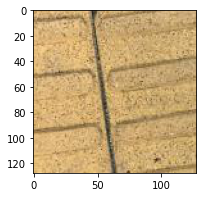

In [14]:
# check
plt.figure(figsize=(3, 3))
plt.imshow(crop_zoomin[1])
plt.show()

In [15]:
# train and test split
train_x, test_n = train_test_split(crop_zoomin, test_size=0.1, shuffle=True, random_state=42)

In [16]:
print(train_x.shape)
print(test_n.shape)

(10179, 128, 128, 3)
(1132, 128, 128, 3)


In [17]:
# test data
a = 48
h = 128
test_a = []
for img in destroyed_data:
  crop_img = img[a : a + h, a : a + h]
  test_a.append(crop_img)

test_a = np.array(test_a)
test_a.shape

(34, 128, 128, 3)

In [18]:
test_x = np.vstack([test_n, test_a])
test_x.shape

(1166, 128, 128, 3)

In [19]:
model = Sequential()

model.add(Input(shape=(128, 128, 3)))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))
model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))

model.add(Dense(2))

model.add(Conv2DTranspose(128, (3, 3), strides=2, activation="relu", padding="same"))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same"))
model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(3, (1, 1), activation="sigmoid", padding="same"))



model.compile(optimizer='adam', loss='mse', metrics=["mae"])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                    

In [21]:
# auto encoder : use model.fit(train_data, train_data, ....)
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    verbose=1,
    patience=50)
hist = model.fit(train_x, train_x, epochs=100, batch_size=16, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/100
573/573 [==============================] - 35s 39ms/step - loss: 0.0120 - mae: 0.0815 - val_loss: 0.0071 - val_mae: 0.0607
Epoch 2/100
573/573 [==============================] - 22s 38ms/step - loss: 0.0063 - mae: 0.0570 - val_loss: 0.0060 - val_mae: 0.0566
Epoch 3/100
573/573 [==============================] - 22s 38ms/step - loss: 0.0059 - mae: 0.0549 - val_loss: 0.0059 - val_mae: 0.0548
Epoch 4/100
573/573 [==============================] - 22s 38ms/step - loss: 0.0057 - mae: 0.0538 - val_loss: 0.0055 - val_mae: 0.0526
Epoch 5/100
573/573 [==============================] - 22s 38ms/step - loss: 0.0056 - mae: 0.0531 - val_loss: 0.0055 - val_mae: 0.0528
Epoch 6/100
573/573 [==============================] - 22s 38ms/step - loss: 0.0055 - mae: 0.0527 - val_loss: 0.0054 - val_mae: 0.0521
Epoch 7/100
573/573 [==============================] - 22s 38ms/step - loss: 0.0055 - mae: 0.0528 - val_loss: 0.0053 - val_mae: 0.0516
Epoch 8/100
573/573 [==============================] - 

## Learning Result

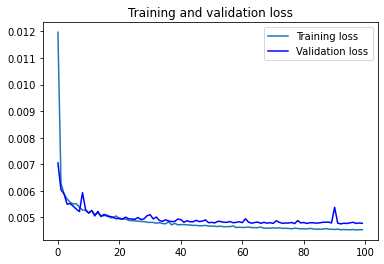

In [22]:
# plot loss history
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [23]:
reconstructed = model.predict(train_x)

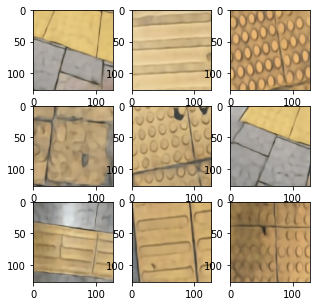

In [24]:
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(reconstructed[i].reshape((128,128,3)))

plt.show()

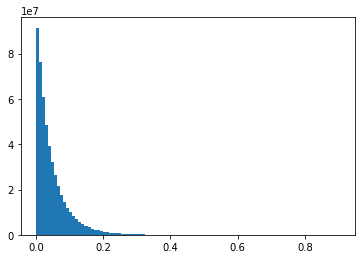

In [25]:
diff = np.abs(reconstructed - train_x)
plt.hist(diff.flatten(), bins=100)
plt.show()

## Threshold 구하기
#### 이상치 탐지 잘 할 수 있도록

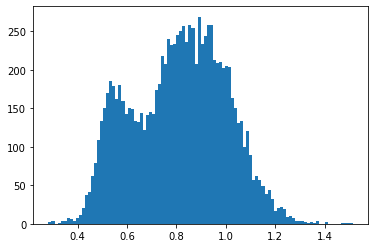

In [26]:
# residual range로 anormaly detection
errors = []

for (image, recon) in zip(train_x, reconstructed):
	# compute the mean squared error between the ground-truth image
	# and the reconstructed image, then add it to our list of errors
  tmp = image - recon
  rge = np.max(tmp) - np.min(tmp) #rge == range
  errors.append(rge)

plt.hist(errors, bins=100)
plt.show()

In [27]:
#test_a 분포만 살펴보기기
reconstructed_a = model.predict(test_a)

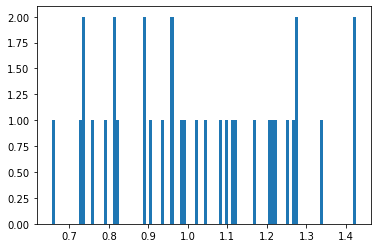

In [28]:
errors_a = []

for (image, recon) in zip(test_a, reconstructed_a):
	# compute the mean squared error between the ground-truth image
	# and the reconstructed image, then add it to our list of errors
  tmp = image - recon
  rge = np.max(tmp) - np.min(tmp) #rge == range
  errors_a.append(rge)

plt.hist(errors_a, bins=100)
plt.show()

In [29]:
print(np.min(errors_a))
print(np.max(errors_a))

print(np.min(errors))
print(np.max(errors))

0.6557288
1.4259393
0.2812832
1.5141478


In [30]:
# threshold how 설정할 지 생각
threshold_l = np.quantile(errors, 0.005)
threshold_r = np.quantile(errors, 0.995)
print(threshold_l)
print(threshold_r)

0.41778375387191774
1.244945049285889


## Test Data Restore

In [31]:
reconstructed_test = model.predict(test_x)

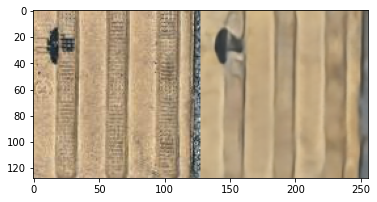

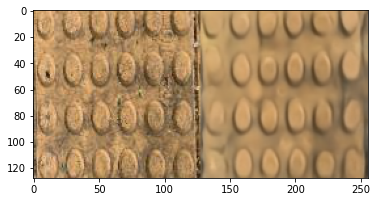

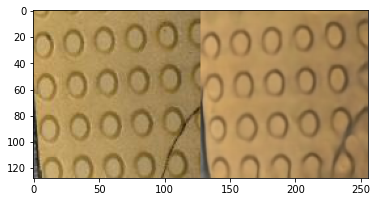

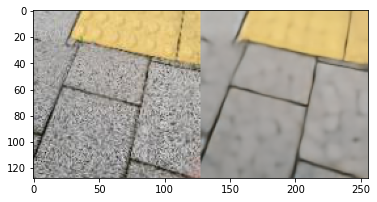

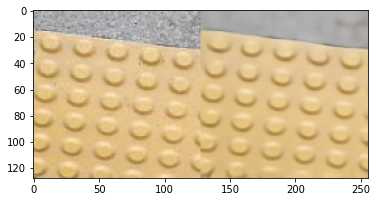

In [32]:
for i in range(5):
  combined = np.hstack([test_x[i], reconstructed_test[i]])
  plt.imshow(combined.squeeze())
  plt.show()

In [33]:
errors_test = []

for (image, recon) in zip(test_x, reconstructed_test):
	# compute the mean squared error between the ground-truth image
	# and the reconstructed image, then add it to our list of errors
	tmp = image - recon
	rge = np.max(tmp) - np.min(tmp) #rge == range
	errors_test.append(rge)

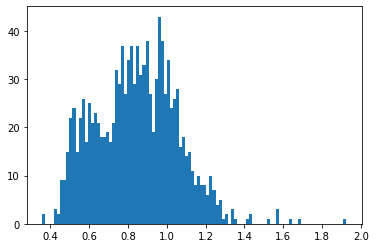

In [34]:
plt.hist(errors_test, bins=100)
plt.show()

In [36]:
anomaly_idxs_l = np.where(np.array(errors_test) <= threshold_l)[0]
anomaly_idxs_r = np.where(np.array(errors_test) >= threshold_r)[0]
print(len(anomaly_idxs_l))
print(len(anomaly_idxs_r))

2
30


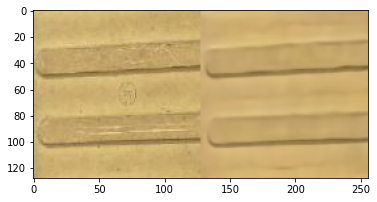

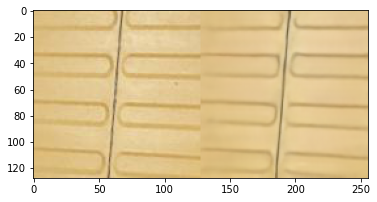

In [38]:
for i in anomaly_idxs_l:  # l은 필요없을 듯.. 최대 최소 분포도 그렇고..
  combined = np.hstack([test_x[i], reconstructed_test[i]])
  plt.imshow(combined.squeeze())
  plt.show()

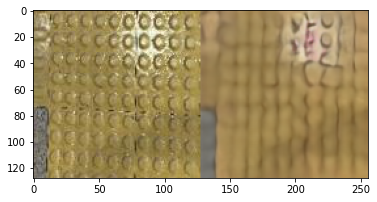

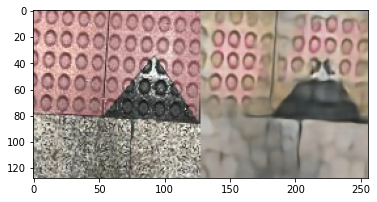

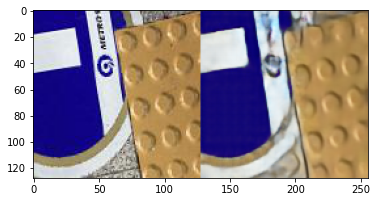

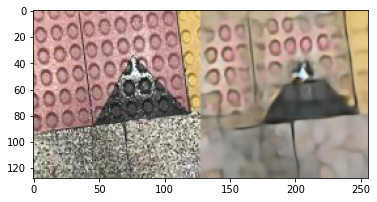

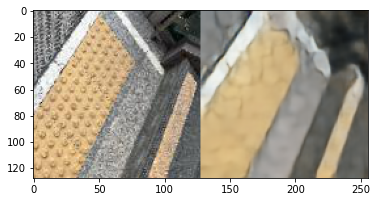

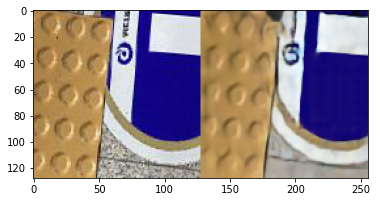

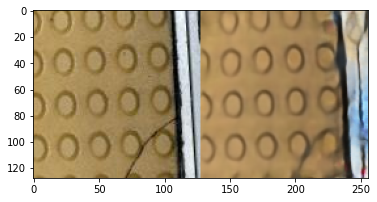

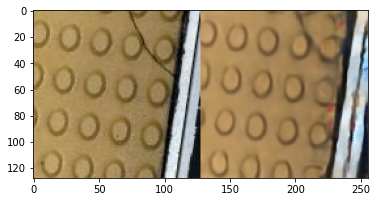

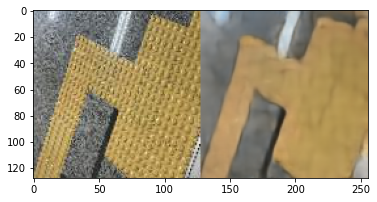

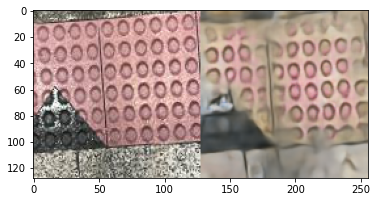

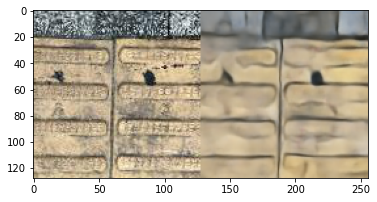

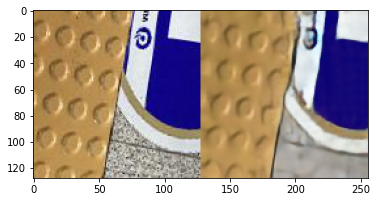

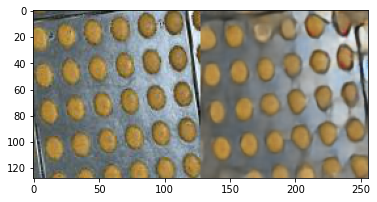

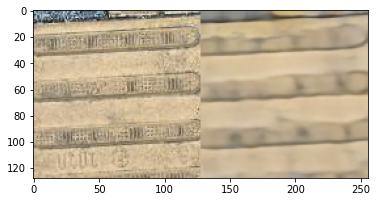

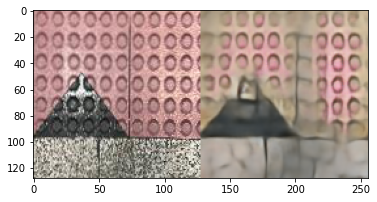

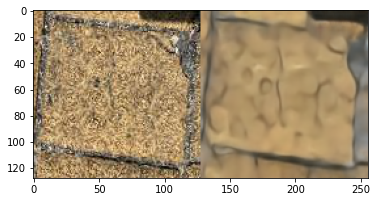

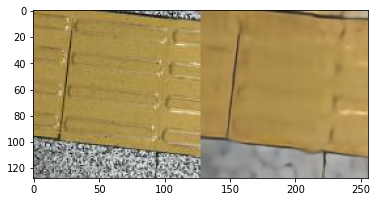

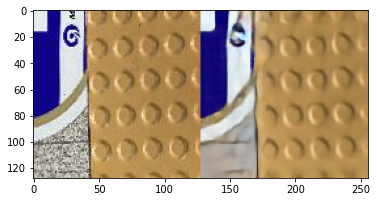

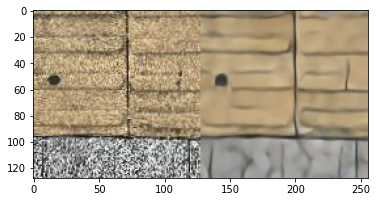

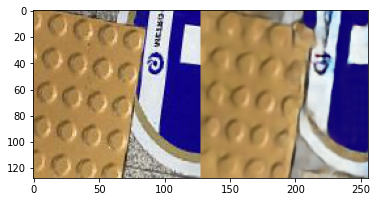

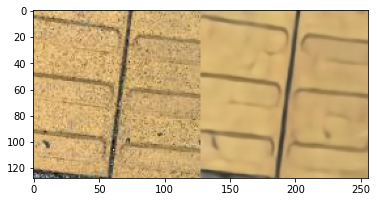

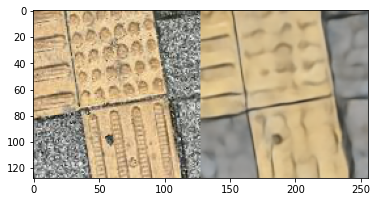

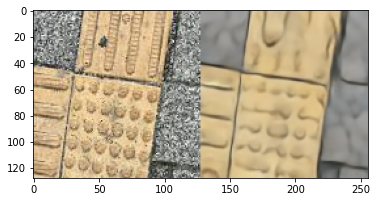

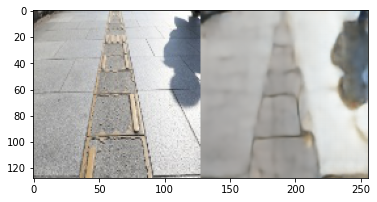

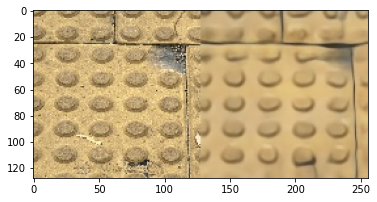

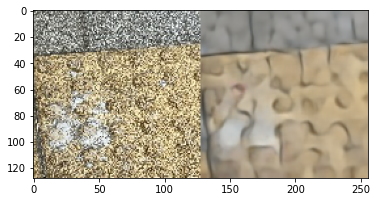

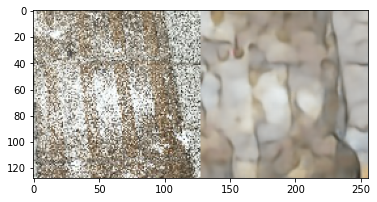

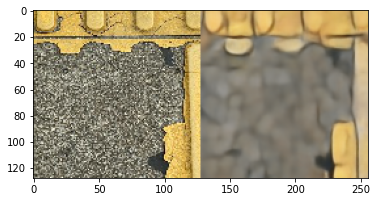

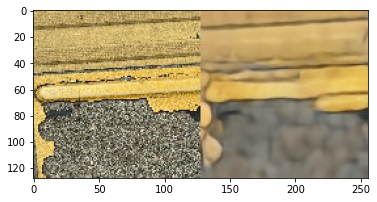

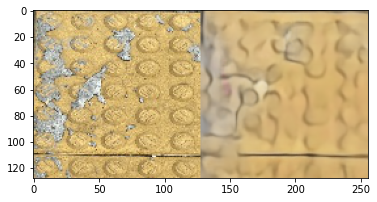

In [39]:
for i in anomaly_idxs_r:
  combined = np.hstack([test_x[i], reconstructed_test[i]])
  plt.imshow(combined.squeeze())
  plt.show()